In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ

import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib

# 한글 깨짐 방지
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
murl='https://movie.daum.net/premovie/released'
response = REQ.urlopen(murl)
soup = BeautifulSoup(response, 'html5lib')
soup

재 예매율</dt>
													<dd>예매율 33.0%</dd>
																							</dl>
																							<a class="link_book" data-tiara-layer="btn_reservation" data-tiara-ordnum="1" href="https://movie.yes24.com/Movie/Ticket?gId=M000076350">예매하기<span class="ico_popcorn"></span></a>
																					</div>
									</li>
																	<li>
										<a class="link_boxthumb" data-tiara-id="2361" data-tiara-layer="poster" data-tiara-ordnum="2" data-tiara-type="movie" href="/moviedb/main?movieId=2361">
											                                                                                        <img alt="화양연화" class="lazy thumb_photo" src="//img1.daumcdn.net/thumb/C338x491/?fname=https://t1.daumcdn.net/movie/84ee1d6c105971563641182144d8c373f4831865" style="display: block;"/><!-- POPCORN-1060 수정-->
										</a>
																				<div class="desc_boxthumb">
											<strong class="tit_join"><a class="link_g" data-tiara-id="2361" data-tiara-layer="moviename" data-tiara-ordnum="2" dat

In [3]:
s='#mArticle'
ulTag = soup.select(s)
ulTag

[<div id="mArticle">
 		<h2 class="screen_out" id="dkbody">상영 예정 영화 본문</h2>
 			<div class="detail_movie detail_premovie">
 				<div class="movie_detail">
 					<h3 class="screen_out">현재 상영작</h3><!-- 텝에 맞게 텍스트 변경 -->
 					<div class="main_detail">
 						<div class="check_reservation">
 							<input class="inp_check" id="checkReservation" type="checkbox"/>
 							<label class="lab_check" for="checkReservation"><span class="ico_popcorn"></span><!--ico_check 추가시 활성화 -->예매가능한 영화만 보기</label>
 						</div>
 						<div class="movie_join" data-tiara-layer="movie_list">
 							<ul class="list_boxthumb">
 																	<li>
 										<a class="link_boxthumb" data-tiara-id="115600" data-tiara-layer="poster" data-tiara-ordnum="1" data-tiara-type="movie" href="/moviedb/main?movieId=115600">
 											                                                                                        <img alt="원더 우먼 1984" class="lazy thumb_photo" src="//img1.daumcdn.net/thumb/C338x491/?fname=https://t

In [4]:
movieList=[]
for l in ulTag:
    # print(l.select('li'))
    for j in l.select('li'):
        movieList.append({'영화명' : j.select_one('.link_g').string,
                          '평점' : j.select_one('.emph_grade').string,
                          '개봉일' : j.select_one('dd').string})
        # print('영화명', j.select_one('.link_g').string)
        # print('평점', j.select_one('.emph_grade').string)
        # print('개봉일', j.select_one('dd').string)
# movieList
        

### 2. 위의 결과를 데이터프레임으로 변환후 평점이 8.0 이상인 영화명 평점 개봉일을 출력하시요

In [5]:
movieDF = pd.DataFrame(movieList)
movieDF

,영화명,평점,개봉일
0,원더 우먼 1984,5.5,2020.12.23 개봉
1,화양연화,8.5,2020.12.24 재개봉
2,극장판 바이올렛 에버가든,8.5,2020.11.12 개봉
3,럭키 몬스터,7.4,2020.12.03 개봉
4,조제,6.9,2020.12.10 개봉
5,썸머 85,7.9,2020.12.24 개봉
6,도굴,7.2,2020.11.04 개봉
7,운디네,9.5,2020.12.24 개봉
8,리플레이,5.6,2020.12.16 개봉
9,100% 울프: 푸들이 될 순 없어,10.0,2020.12.24 개봉


In [6]:
# 문자열을 float형으로 변환
movieDF = movieDF.astype({'평점':float})
movieDF['평점']

0      5.5
1      8.5
2      8.5
3      7.4
4      6.9
5      7.9
6      7.2
7      9.5
8      5.6
9     10.0
10     7.8
11     7.0
12     7.9
13     9.2
14     9.0
15     8.7
16     9.5
17     8.7
18     9.5
19     6.4
Name: 평점, dtype: float64

In [7]:
movieDF[movieDF['평점'] >= 8.0]

,영화명,평점,개봉일
1,화양연화,8.5,2020.12.24 재개봉
2,극장판 바이올렛 에버가든,8.5,2020.11.12 개봉
7,운디네,9.5,2020.12.24 개봉
9,100% 울프: 푸들이 될 순 없어,10.0,2020.12.24 개봉
13,러브레터,9.2,2020.12.23 재개봉
14,"내 어깨 위 고양이, 밥 2",9.0,2020.12.24 개봉
15,러브 액츄얼리,8.7,2020.12.16 재개봉
16,언플랜드,9.5,2020.12.17 개봉
17,함께 있을 수 있다면,8.7,2020.12.24 개봉
18,누군가 어디에서 나를 기다리면 좋겠다,9.5,2020.12.17 개봉


### 3. x축을 영화명 으로 y축을 평점으로 라인차트를 그리시요

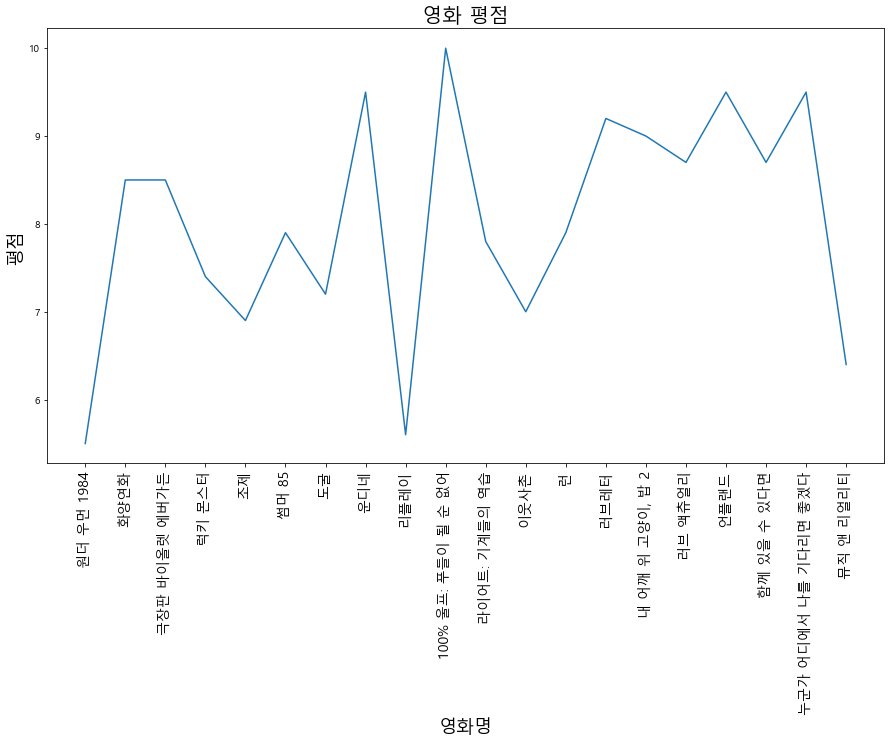

In [9]:
m_chart = movieDF.set_index('영화명')[['평점']]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(m_chart)
ax.set_title('영화 평점', size=20)
ax.set_xlabel('영화명', size=18)
ax.set_ylabel('평점', size=18)
ax.set_xticklabels(list(m_chart.index), rotation=90, fontsize=14)
plt.show()

### 4. 2020년11월 10일 이후 개봉한 영화명,평점,개봉일을 구하시요

In [15]:
# 재개봉 글자 제거!
movieDF['개봉일'] = movieDF['개봉일'].map(lambda x: x.rstrip('재개봉'))

In [25]:
movieDF['개봉일'] = pd.to_datetime(movieDF['개봉일'])
movieDF['개봉일']

0    2020-12-23
1    2020-12-24
2    2020-12-03
3    2020-12-10
4    2020-11-12
5    2020-12-24
6    2020-11-04
7    2020-12-16
8    2020-12-24
9    2020-11-25
10   2020-11-20
11   2020-12-23
12   2020-12-24
13   2020-12-23
14   2020-12-24
15   2020-12-16
16   2020-12-24
17   2020-12-17
18   2020-12-23
19   2020-12-17
Name: 개봉일, dtype: datetime64[ns]

In [33]:
# 인덱스 지정
movieDF.set_index('개봉일', inplace=True)

In [37]:
movieDF.loc['2020-12-10':'2020-12-31'].sort_index()

,영화명,평점
개봉일,,
2020-12-10,조제,6.9
2020-12-16,리플레이,6.0
2020-12-16,러브 액츄얼리,8.7
2020-12-17,언플랜드,9.5
2020-12-17,퍼스트 러브,6.7
2020-12-23,원더 우먼 1984,5.5
2020-12-23,라이어트: 기계들의 역습,7.8
2020-12-23,러브레터,9.2
2020-12-23,뮤직 앤 리얼리티,6.4
